In [13]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy
from collections import defaultdict, Counter
import datetime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
print(os.getcwd())
sys.path.insert(0, str(os.path.dirname(os.path.realpath(os.getcwd()))))
print(sys.path)

/mnt/f/dev/git/miRExplore/python/nbs
['/mnt/f/dev/git/miRExplore/python', '/mnt/f/dev/git/miRExplore/python', '/mnt/f/dev/git/miRExplore/python/textdb/../', '/mnt/f/dev/git/miRExplore/python/textdb/../', '/mnt/f/dev/git/miRExplore/python', '/mnt/f/dev/git/miRExplore/python/nbs', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']


In [15]:
from textdb.PubmedDateDB import PubmedDateDB
from synonymes.mirnaID import miRNA, miRNAPART,miRNACOMPARISONLEVEL
from textdb.MiGenRelDB import MiGenRelDB

In [39]:
allDatesFile = "/mnt/d/dev/data/pmid_jun2020/aggregated_pmid/allpmids.date"
dateDB = PubmedDateDB.loadFromFile(allDatesFile)

Loading Dates
Loading Dates Finished


In [41]:
len(dateDB.docid2date)

31295217

In [42]:
dateDB.get_document("31378854")

(2019, 8, 2)

In [44]:
ym2pmids = defaultdict(set)
for x in dateDB.docid2date:
    ddate = list(dateDB.docid2date[x])
    
    if ddate[0] == 0:
        continue
        
    if ddate[1] == 0:
        ddate[1] = 1
    ddate[2] = 1
    
    try:
        ym2pmids[datetime.datetime.strptime("{}-{}-{}".format(*ddate), '%Y-%m-%d')].add(x)
    except:
        print(ddate)
        break

In [45]:
ym2counts = Counter()
for date in ym2pmids:
    ym2counts[date] += len(ym2pmids[date])

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()

def plotDateCounts(xdates, ydata, fname=None):
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')

    fig, ax = plt.subplots(figsize=(12,6))
    """
    xdatesTS = [datetime.datetime.timestamp(x) for x in xdates]
    allyears = sorted(set([int(x.year) for x in xdates]))
    
    minYearNum = min(allyears)
    maxYearNum = max(allyears)
    
    minYear = datetime.datetime.strptime("{}-1-1".format(minYearNum), '%Y-%m-%d')
    maxYear = datetime.datetime.strptime("{}-12-31".format(maxYearNum), '%Y-%m-%d')
    
    betweenTicks = []
    for i in range(minYear.year+1, maxYear.year+1):
        betweenTicks.append(
            datetime.datetime.strptime("{}-1-1".format(i), '%Y-%m-%d')
        )
        
    allticks = [minYear] + betweenTicks + [maxYear]
    """
    sns.scatterplot(x=xdates, y=ydata, ax=ax)
    

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)

    # round to nearest years.
    ax.set_xlim(min(xdates), max(xdates))
    #ax.set_xticks([datetime.datetime.timestamp(x) for x in allticks])
    #xticks = ax.get_xticks()
    #xticks_dates=[datetime.datetime.fromtimestamp(x).strftime('%Y-%m') for x in xticks]
    #ax.set_xticklabels(xticks_dates)
    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    #ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
    ax.grid(True)
    

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    #fig.autofmt_xdate()
    plt.xticks(rotation=90, ha="center")

    if fname != None:
        plt.savefig(fname)
    plt.show()

[datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(1980, 2, 1, 0, 0), datetime.datetime(1980, 3, 1, 0, 0), datetime.datetime(1980, 4, 1, 0, 0), datetime.datetime(1980, 5, 1, 0, 0), datetime.datetime(2020, 11, 1, 0, 0), datetime.datetime(2020, 12, 1, 0, 0), datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 4, 1, 0, 0)]


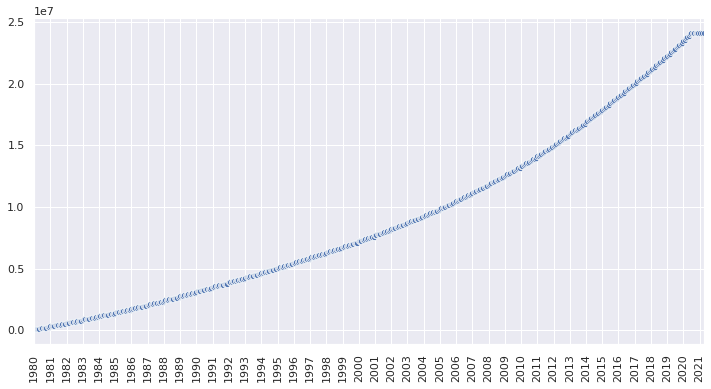

In [60]:
xdates = sorted([x for x in ym2counts])
xdates = [x for x in xdates if x.year >= 1980]
ydata = [ym2counts[x] for x in xdates]

ycumdata = [ydata[0]]
for i in range(1, len(ydata)):
    cumCount = ycumdata[-1] + ydata[i]
    ycumdata.append(cumCount)

print(xdates[:5]+xdates[-5:])
plotDateCounts(xdates, ycumdata, "pubmed_all.png")


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


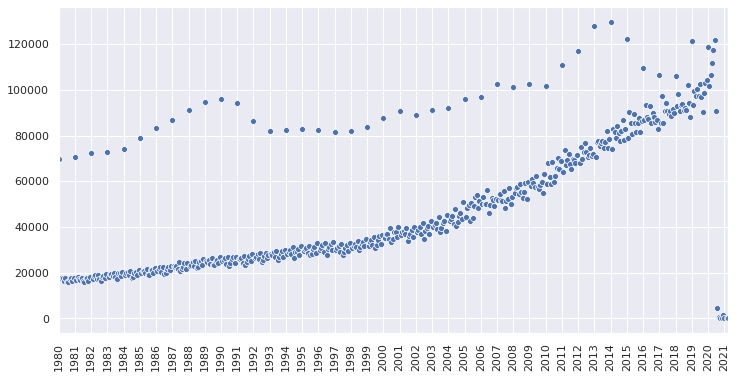

In [47]:
xdates = sorted([x for x in ym2counts])
xdates = [x for x in xdates if x.year >= 1980]
ydata = [ym2counts[x] for x in xdates]

plotDateCounts(xdates, ydata)

In [48]:
from Bio import Entrez
Entrez.email = "joppich@compbio.cc"

In [49]:
sum([ym2counts[x] for x in ym2counts])

29317804

In [50]:
from utils.tmutils import normalize_gene_names
normGeneSymbols = normalize_gene_names(path="/mnt/d/owncloud/data/miRExplore/obodir/" + "/hgnc_no_withdrawn.syn")

In [51]:
pmidBase ="/mnt/d/dev/data/pmid_jun2020/aggregated_pmid/"

print("Loading hsa")
mirelPMIDhsa = MiGenRelDB.loadFromFile(pmidBase + "/mirna_gene.hsa.pmid", ltype="mirna", rtype="gene", normGeneSymbols=normGeneSymbols, switchLR=True, stopAfter=-1)
print("Loading mmu")
mirelPMIDmmu = MiGenRelDB.loadFromFile(pmidBase + "/mirna_gene.mmu.pmid", ltype="mirna", rtype="gene", normGeneSymbols=normGeneSymbols, switchLR=True, stopAfter=-1)

relDBs = [mirelPMIDhsa, mirelPMIDmmu]

Loading hsa
Gene Symbols Normalized 77476
Loaded file /mnt/d/dev/data/pmid_jun2020/aggregated_pmid//mirna_gene.hsa.pmid
Accepted Doc IDs 40682
Rejected Doc IDs 0
Seen genes 7906
Seen miRNAs 2116
Seen Harm. miRNAs 1615
Loading mmu
Gene Symbols Normalized 12375
Loaded file /mnt/d/dev/data/pmid_jun2020/aggregated_pmid//mirna_gene.mmu.pmid
Accepted Doc IDs 36823
Rejected Doc IDs 0
Seen genes 6431
Seen miRNAs 2048
Seen Harm. miRNAs 1578


In [52]:
miRNAGenePMIDs = set()
for rdb in relDBs:
    for rpmid in rdb.get_evidence_docids():
        miRNAGenePMIDs.add(rpmid)

In [53]:
ym2InteractionCounts = Counter()
countsperYear = Counter()
totalPMIDs = 0
for date in ym2pmids:
    intersectPMIDs = len(miRNAGenePMIDs.intersection(ym2pmids[date]))
    ym2InteractionCounts[date] += intersectPMIDs
    totalPMIDs += intersectPMIDs
    countsperYear[date.year] += intersectPMIDs
    
print(totalPMIDs)

35486


In [54]:
sum([ym2InteractionCounts[x] for x in ym2InteractionCounts])

35486

In [56]:
for x in sorted(countsperYear):
    if x < 1980:
        continue
    
    print(x, countsperYear[x])

1980 0
1981 0
1982 0
1983 0
1984 0
1985 0
1986 0
1987 0
1988 0
1989 1
1990 1
1991 1
1992 1
1993 1
1994 0
1995 0
1996 1
1997 0
1998 0
1999 2
2000 1
2001 1
2002 1
2003 4
2004 7
2005 19
2006 44
2007 117
2008 280
2009 532
2010 847
2011 1264
2012 1697
2013 2339
2014 2873
2015 3856
2016 3872
2017 4635
2018 5175
2019 5412
2020 2502
2021 0


In [57]:
sDates = sorted([d for d in ym2InteractionCounts])

sDates[:5]+sDates[-5:]

[datetime.datetime(1781, 1, 1, 0, 0),
 datetime.datetime(1781, 2, 1, 0, 0),
 datetime.datetime(1781, 3, 1, 0, 0),
 datetime.datetime(1781, 4, 1, 0, 0),
 datetime.datetime(1781, 5, 1, 0, 0),
 datetime.datetime(2020, 11, 1, 0, 0),
 datetime.datetime(2020, 12, 1, 0, 0),
 datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 3, 1, 0, 0),
 datetime.datetime(2021, 4, 1, 0, 0)]

[datetime.datetime(2005, 1, 1, 0, 0), datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 3, 1, 0, 0), datetime.datetime(2005, 4, 1, 0, 0), datetime.datetime(2005, 5, 1, 0, 0), datetime.datetime(2020, 8, 1, 0, 0), datetime.datetime(2020, 9, 1, 0, 0), datetime.datetime(2020, 10, 1, 0, 0), datetime.datetime(2020, 11, 1, 0, 0), datetime.datetime(2020, 12, 1, 0, 0)]


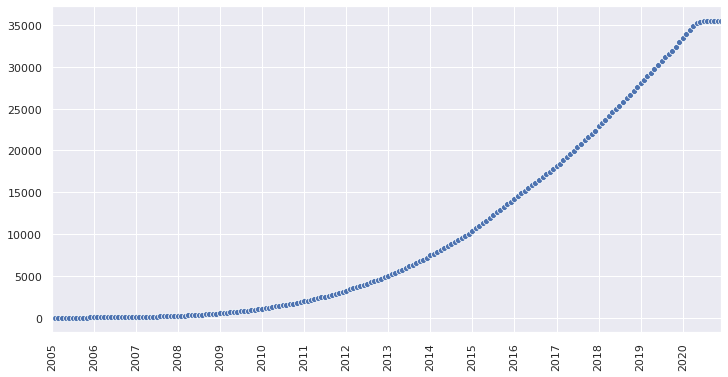

In [58]:
xdates = sorted([x for x in ym2InteractionCounts])
xdates = [x for x in xdates if x.year >= 2005 and x.year < 2021]
ydata = [ym2InteractionCounts[x] for x in xdates]

ycumdata = [ydata[0]]
for i in range(1, len(ydata)):
    cumCount = ycumdata[-1] + ydata[i]
    ycumdata.append(cumCount)

print(xdates[:5]+xdates[-5:])
plotDateCounts(xdates, ycumdata, "pubmed_mirna_gene.png")


In [ ]:
len(ycumdata)

In [16]:
import requests, json
from synonymes.GeneOntology import GeneOntology
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [17]:
diseaseObo = GeneOntology("/mnt/f/dev/data/pmid_jun2020/obodir/" + "/doid.obo")
cellObo = GeneOntology("/mnt/f/dev/data/pmid_jun2020/obodir/" + "/meta_cells.obo")

infodict2obo = {}
infodict2obo["cells"] = cellObo
infodict2obo["disease"] = diseaseObo

0
10000
no parent 2382
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
no parent 43429


In [18]:
def getPMIDInfo(jsonRes, infodict, pmid):
    
    diseaseInfos = jsonRes["pmidinfo"][infodict].get(pmid, [])
    diseaseInfo = ""
        
    infoObo = infodict2obo.get(infodict, None)
    
    ignoreTerms = None
    if infodict == "cells":
        ignoreTerms = []
        
        for ignoreTerm in ["META:3", "META:707", "EFO:0000408", "META:403", "EFO:0000408", "BFO:0000017"]:
            ignoreTerms += [x.termid for x in infoObo[ignoreTerm].getAllChildren()]

    allFoundTerms = set()
    termid2termname = {}
    allDiseaseInfos = Counter()
    for di in diseaseInfos:
        dit = di.get("termname", None)
        diid = di.get("termid", None)
        
        #print(di["termid"], dit)
        
        if dit in ["cell", "disease", "cells", "protein", "data item", "role", "signaling", "immune response"]:
            continue
            
        if infodict == "cells" and diid != None and diid.startswith(("CHEBI", "PR", "DOID", "UBERON", "IAO")):
            continue
        
        if diid != None:
            allFoundTerms.add(diid)
            termid2termname[diid] = dit
            
        
        for diid in allFoundTerms:
            
            if infoObo != None:
                oboterm = infodict2obo[infodict][diid]
                
                if oboterm != None:
                    allchildren = [x.termid for x in oboterm.getAllChildren()]
                    allparents = [x.id for x in oboterm.getAllParents()]
                    
                    childIntersect = set(allchildren).intersection(allFoundTerms)
                    parentIntersect = set(allparents).intersection(allFoundTerms)

                    if (len(parentIntersect)>0) or (ignoreTerms != None and diid in ignoreTerms):
                        
                        igTerm = ignoreTerms != None and diid in ignoreTerms
                        
                        #print("skipping", diid, termid2termname[diid], len(parentIntersect), igTerm)
                        continue
                        
                    if len(childIntersect)> 0:
                        for x in childIntersect:
                            
                            if termid2termname[x] in allDiseaseInfos:
                                del allDiseaseInfos[termid2termname[x]]
                            #print("removing", termid2termname[x])
                        
        
            dit = termid2termname[diid]
            allFoundTerms.add(diid)
            
            allDiseaseInfos[dit] += 1

    allDiseaseInfos = [x[0] for x in allDiseaseInfos.most_common(4)]
    
    diseaseInfo = ""
    xlen = 20
    for xi, x in enumerate(allDiseaseInfos):
        

        
        if len(diseaseInfo) + len(x) > xlen:
            if xi > 0:
                diseaseInfo += ";"
            
            diseaseInfo += "\n" + x
            
            xlen += 20
                        
                
        else:
            if xi > 0:
                diseaseInfo += "; "
                
            diseaseInfo += x
            
            
                
    return diseaseInfo
    


In [36]:
def make_timeline( allInteractions, title, outpath=None ):

    allInteractions = sorted(allInteractions, key=lambda x: x[1])
    
    names = []
    dates = []

    for x in allInteractions:
        pmid = x[0] + "\n" + x[2] + "\n" + x[3] + "\n" + x[4]
        date = datetime.datetime.fromtimestamp(x[1])

        names.append(pmid)
        dates.append(date)
        
    alllevels = [-2,2,-1,1] #-3,3,
        
    # Choose some nice levels
    levels = np.tile(alllevels,
                     int(np.ceil(len(dates)/len(alllevels))))[:len(dates)]
    
    szFac = len(names) // 15
    szFac += 1

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(szFac * 15, 8), constrained_layout=True)
    ax.set(title=title)

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C3-", basefmt="k-",
                                             use_line_collection=True)

    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, ltext, va in zip(dates, levels, names, vert):
        ax.annotate(ltext, xy=(d, l+ (-1) * np.sign(l) * 0.75), xytext=(-10, np.sign(l)*4),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    
    if outpath != None:
        plt.savefig(outpath)
    plt.show()

In [8]:
all_pubs = set()

for x in jsonRes['rels']:
    for y in x["evidences"]:
        
        docID = y.get("docid", None)
        docDate = y.get("docdate", None)
        
        if docID == None or docDate == None:
            continue
        
        gene = y.get("lid", None)
        mirStr = y.get("rid", None)
        
        mirObj = miRNA(mirStr)
        
        diseaseInfo = getPMIDInfo(jsonRes, "disease", docID)
        cellInfo = getPMIDInfo(jsonRes, "cells", docID)
        goInfo = getPMIDInfo(jsonRes, "go", docID)
            
        
        all_pubs.add((docID, docDate, diseaseInfo, cellInfo, goInfo))
        

NameError: name 'jsonRes' is not defined

In [20]:
def generateInteractionHistory( gene, mir, context=None, outfile=None):
    
    if not gene is None:    
        requestDict = {"gene": [gene], "sentences": "false"}
    elif not mir is None:
        requestDict = {"mirna": [mir], "sentences": "false"}
        
    origGene = gene
    origMir = mir
        
    if not context is None:
        for x in context:
            requestDict[x] = context[x]

    r = requests.post("http://localhost:65500/find_interactions", data=json.dumps(requestDict))
    jsonRes = r.json()
    
    all_pubs = set()
    
    targetMir = None
    if not mir is None:
        targetMir = miRNA(mir)
        
    doc2evidences = defaultdict( lambda: defaultdict(set))

    for x in jsonRes['rels']:
        for y in x["evidences"]:

            docID = y.get("docid", None)
            docDate = y.get("docdate", None)

            if docID == None or docDate == None:
                continue

            gene = y.get("lid", None)
            mirStr = y.get("rid", None)

            mirObj = miRNA(mirStr)
            
            if not targetMir is None:
                if not targetMir.accept(mirObj, miRNACOMPARISONLEVEL.PRECURSOR):
                    continue
            
            
            relInteract = y.get("rel_interaction", "MIR_GENE")
            relCategory = y.get("rel_category", "DOWN")
            
            e1 = gene
            e2 = mirStr          

            diseaseInfo = getPMIDInfo(jsonRes, "disease", docID)
            cellInfo = getPMIDInfo(jsonRes, "cells", docID)
            goInfo = getPMIDInfo(jsonRes, "go", docID)
            
            doc2evidences[docID][(e1, e2)].add( (relInteract, relCategory) )

            all_pubs.add((docID, docDate, diseaseInfo, cellInfo, goInfo))
            
            
    all_pubs_print = set()
    
    for x in all_pubs:
        
        x = list(x)
        
        docID = x[0]
        
        if docID == "23041630":
            print(x)
        
        for gene, mirStr in sorted(doc2evidences[docID]):
                    
            allEvs = doc2evidences[docID][(gene, mirStr)]
            
            if docID == "23041630":
                print(gene, mirStr, allEvs)
                
            allInteracts = list(set([y[0] for y in allEvs]))
            allCats = list(set([y[1] for y in allEvs]))

            if len(allInteracts) != 1:
                e1 = mirStr
                e2 = gene   
                e12c = u"\u21ff"

            else:
                relInteract = allInteracts[0]

                if relInteract == "MIR_GENE":
                    e1 = mirStr
                    e2 = gene               
                else:
                    e1 = gene
                    e2 = mirStr

                relCategory = "NA"
                if len(allCats) == 1:
                    relCategory = allCats[0]

                if len(allCats)== 2 and "DOWN" in allCats and "NEU" in allCats:
                    relCategory = "NEU"            

                if relCategory in ["DOWN", "DOWN*"]:
                    e12c = u"\u22a3"
                elif relCategory in ["UP"]:
                    e12c = u"\u2191"
                elif relCategory in ["NEU"]:
                    e12c = u"\u21e5"
                elif relCategory in ["NA"]:
                    print(e1, e2,allInteracts,allCats)
                    print()
                    e12c = u"\u2974"
                    e12c = u"\u1e6a"

            xDocID = u"\n{} {} {}".format(e1, e12c, e2)
            x[0] += xDocID

        all_pubs_print.add(tuple(x))
            
    print("found results", len(all_pubs_print))
    
    if not origGene is None and not origMir is None:
        title = "{}-{} interactions".format(origGene, origMir)
        
    else:
        title="{} interactions".format(origGene if origMir is None else origMir)
    
    if len(all_pubs_print):
        make_timeline( all_pubs_print, title, outpath=outfile )
    



In [15]:
requestDict = {"gene": ["CCL2"], "sentences": "false"}

r = requests.post("http://localhost:65500/find_interactions", data=json.dumps(requestDict))
jsonRes = r.json()

In [6]:
for x in jsonRes["pmidinfo"]:
    print(x, jsonRes["pmidinfo"][x].get("31875973", None))

cells [{'docid': '31875973', 'evidences': [['31875973.2.6', 116, 123, 'protein'], ['31875973.2.6', 124, 131, 'protein']], 'termid': 'META:707', 'termname': 'protein'}, {'docid': '31875973', 'evidences': [['31875973.2.12', 107, 116, 'signaling']], 'termid': 'META:403', 'termname': 'signaling'}, {'docid': '31875973', 'evidences': [['31875973.1.1', 45, 50, 'heart'], ['31875973.2.1', 44, 49, 'heart'], ['31875973.2.2', 147, 152, 'heart']], 'termid': 'META:1353', 'termname': 'circulatory organ'}, {'docid': '31875973', 'evidences': [['31875973.1.1', 16, 27, 'Ventricular'], ['31875973.2.2', 5, 16, 'Ventricular']], 'termid': 'META:894', 'termname': 'stomach'}, {'docid': '31875973', 'evidences': [['31875973.1.1', 45, 50, 'heart'], ['31875973.2.1', 44, 49, 'heart'], ['31875973.2.2', 147, 152, 'heart']], 'termid': 'META:896', 'termname': 'heart'}, {'docid': '31875973', 'evidences': [['31875973.1.1', 45, 50, 'heart'], ['31875973.2.1', 44, 49, 'heart'], ['31875973.2.2', 147, 152, 'heart']], 'termid'

In [7]:
for x in jsonRes['rels']:
    for y in x["evidences"]:
        
        docID = y.get("docid", None)
        docDate = y.get("docdate", None)
        
        #print(y)

In [9]:
import matplotlib
matplotlib.rcParams['font.family'] = ['Hack']

found results 6


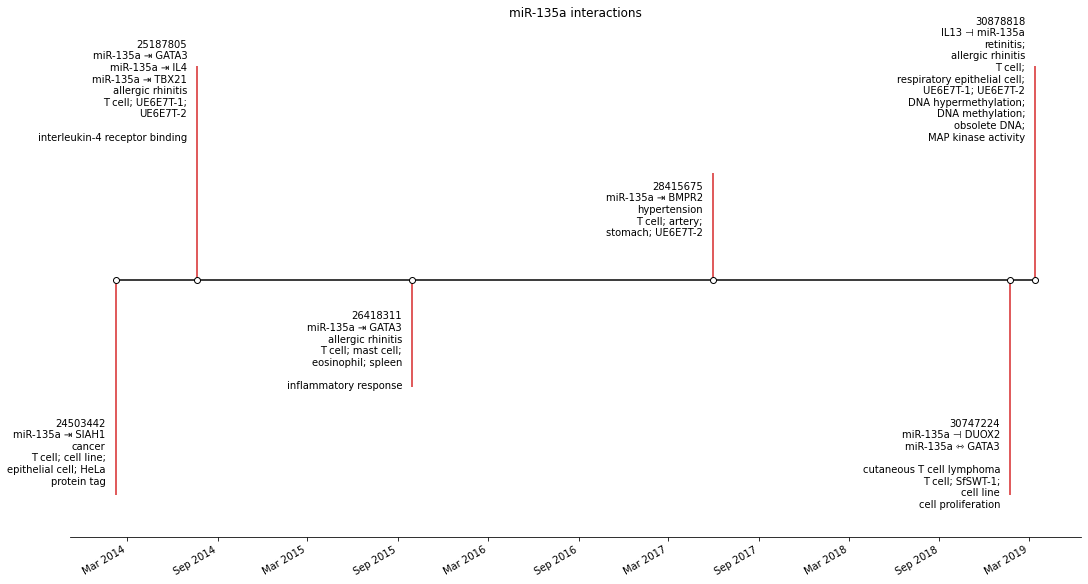

In [38]:
generateInteractionHistory(gene=None, mir="miR-135a", context={'cells': [{'termid': "META:44"}]}, outfile="mir135a_timeline.png")

found results 3


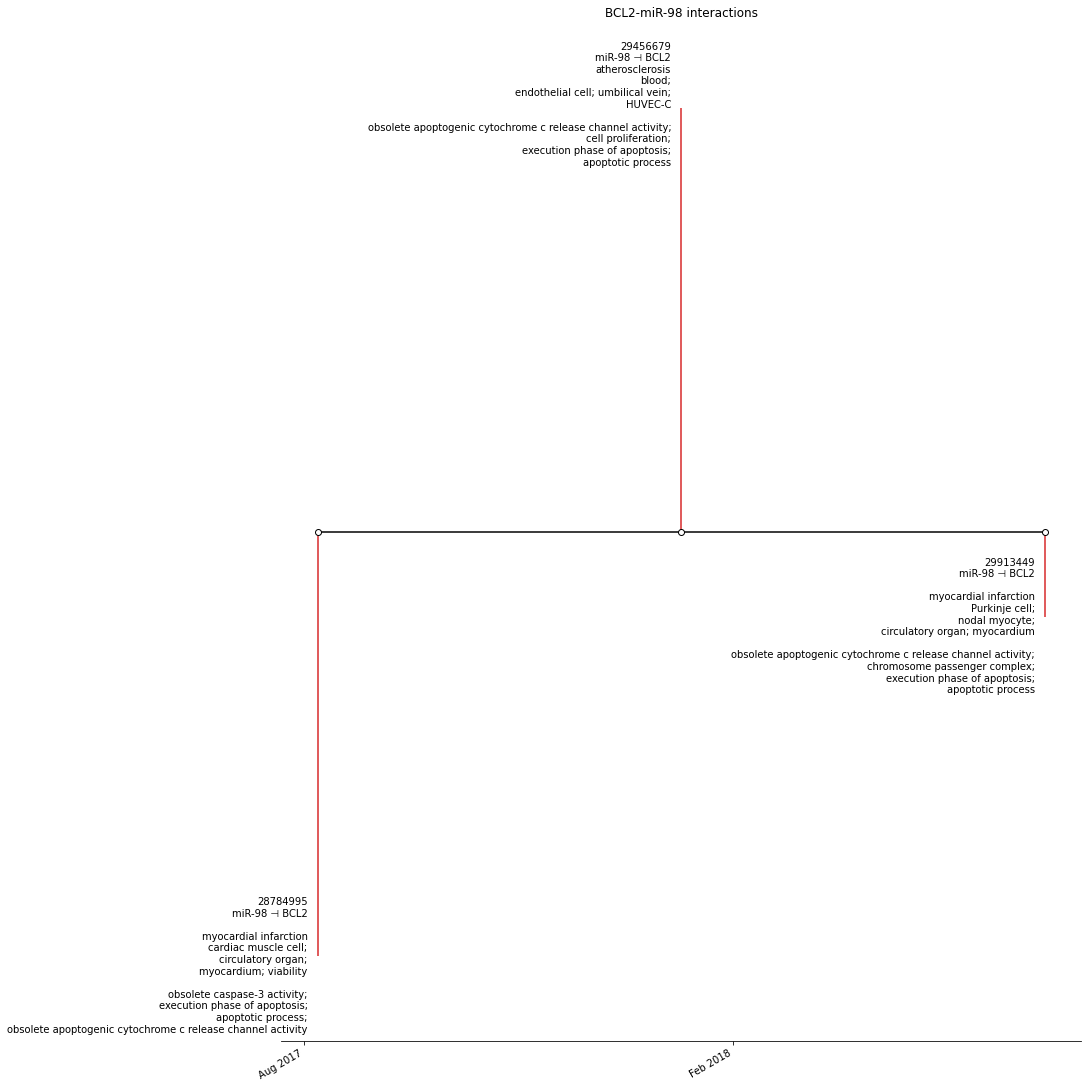

In [97]:
generateInteractionHistory(gene="BCL2", mir="miR-98", context={'disease': [{'termid': "DOID:1287"}]})

miR-155 CCL2 ['MIR_GENE'] ['UP', 'DOWN']

['23041630', 1349647200.0, 'atherosclerosis', 'leukocyte', '\nobsolete low-density lipoprotein']
CCL2 miR-155 {('MIR_GENE', 'UP'), ('MIR_GENE', 'DOWN')}
miR-155 CCL2 ['MIR_GENE'] ['UP', 'DOWN']

miR-196a CCL2 ['MIR_GENE'] ['NEU', 'UP']

miR-145 CCL2 ['MIR_GENE'] ['NEU', 'UP']

found results 29


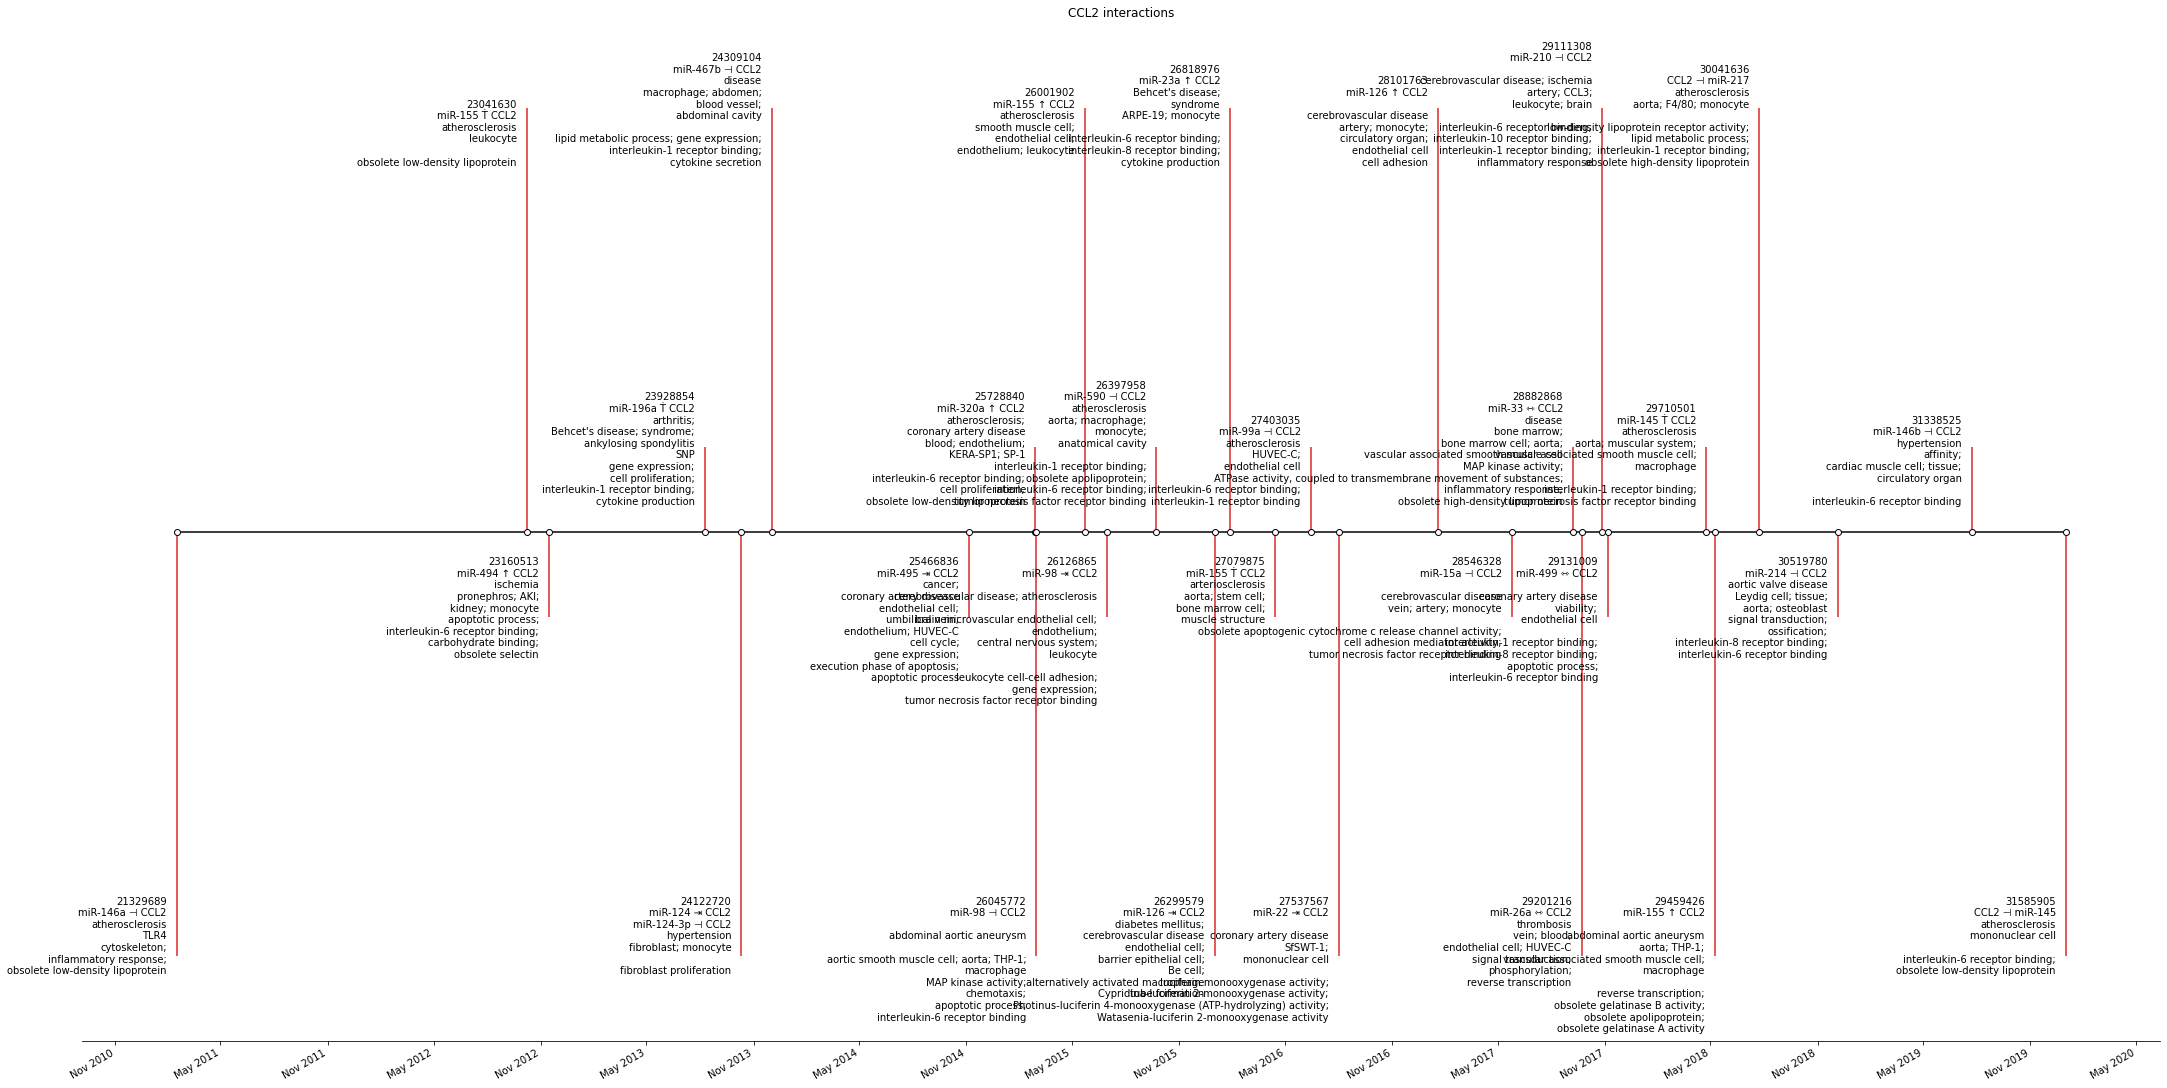

In [83]:
generateInteractionHistory(gene="CCL2", mir=None, context={'disease': [{'termid': "DOID:1287"}]})

found results 6


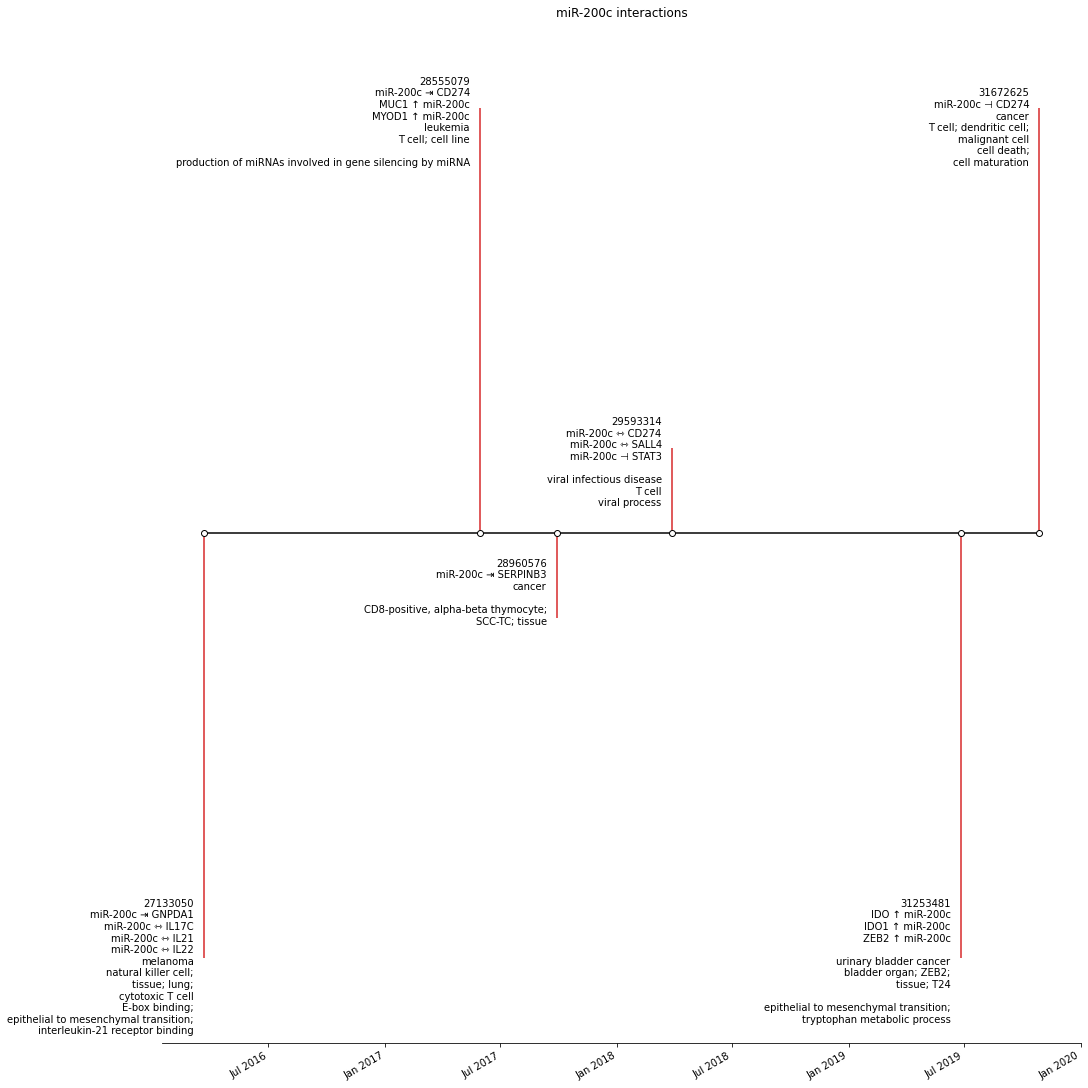

In [109]:
generateInteractionHistory(gene=None, mir="miR-200c", context={'cells': [{'termid': "META:44"}]})#context={'disease': [{'termid': "DOID:2841"}]}) 

PPARA miR-98 ['GENE_MIR'] ['NEU', 'UP', 'DOWN']

PPARD miR-98 ['GENE_MIR'] ['NEU', 'UP', 'DOWN']

PPARG miR-98 ['GENE_MIR'] ['NEU', 'UP', 'DOWN']

found results 14


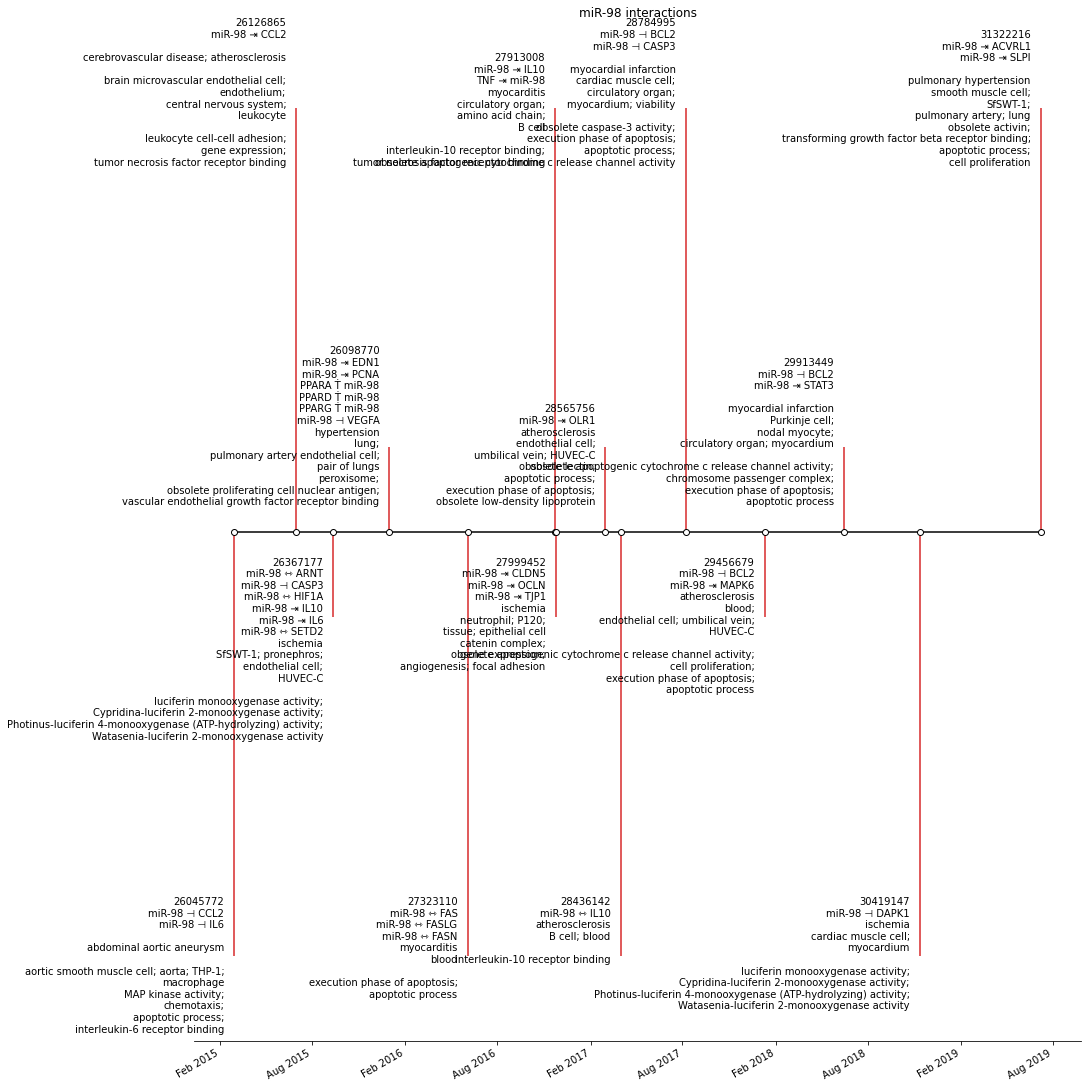

In [105]:
generateInteractionHistory(gene=None, mir="miR-98", context={'disease': [{'termid': "DOID:1287"}]}, outfile="mir98_interactions.png") 

In [ ]:
#infodict2obo["cells"]["META:5"].getAllChildren()

miR-98 E2F1 ['MIR_GENE'] ['NEU', 'UP']

PPARA miR-98 ['GENE_MIR'] ['NEU', 'UP', 'DOWN']

PPARD miR-98 ['GENE_MIR'] ['NEU', 'UP', 'DOWN']

PPARG miR-98 ['GENE_MIR'] ['NEU', 'UP', 'DOWN']

miR-98 MTDH ['MIR_GENE'] ['NEU', 'UP', 'DOWN']

miR-98 IGF1 ['MIR_GENE'] ['NEU', 'UP']

miR-98 EZH2 ['MIR_GENE'] ['NEU', 'UP', 'DOWN']

miR-98 BCL2 ['MIR_GENE'] ['UP', 'DOWN']

miR-98 IL18 ['MIR_GENE'] ['NEU', 'UP', 'DOWN']

miR-98 IL1A ['MIR_GENE'] ['NEU', 'UP', 'DOWN']

miR-98 IL1B ['MIR_GENE'] ['NEU', 'UP', 'DOWN']

miR-98 IL36A ['MIR_GENE'] ['NEU', 'UP', 'DOWN']

found results 122


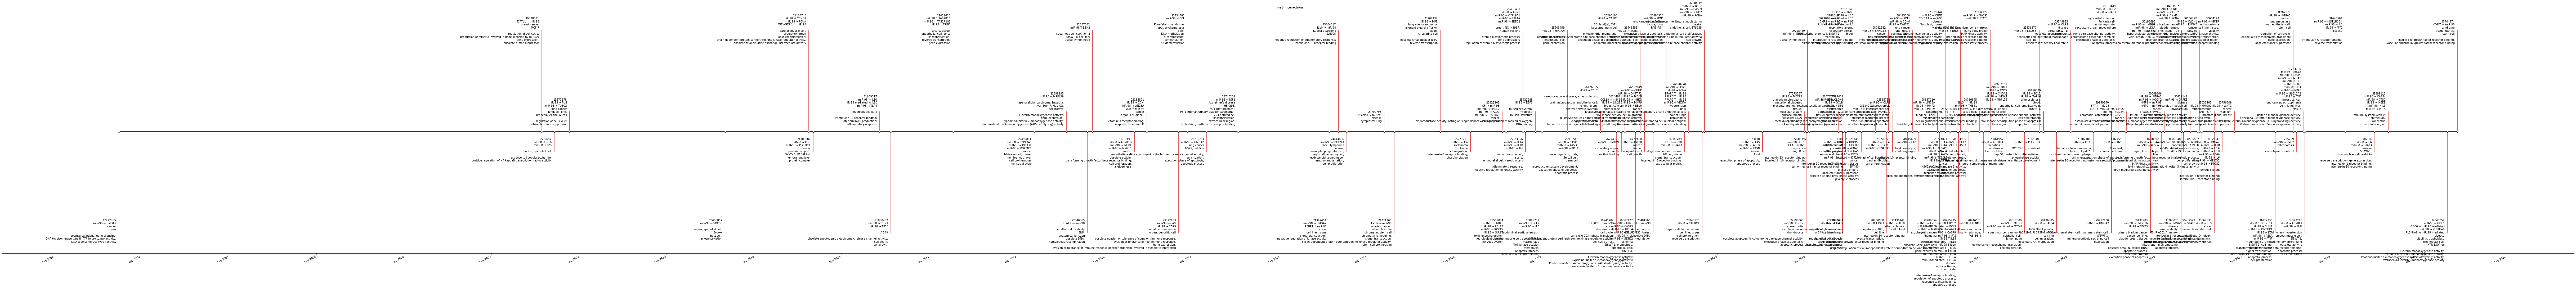

In [95]:
generateInteractionHistory(gene=None, mir="miR-98", outfile="mir98_interactions.png") 

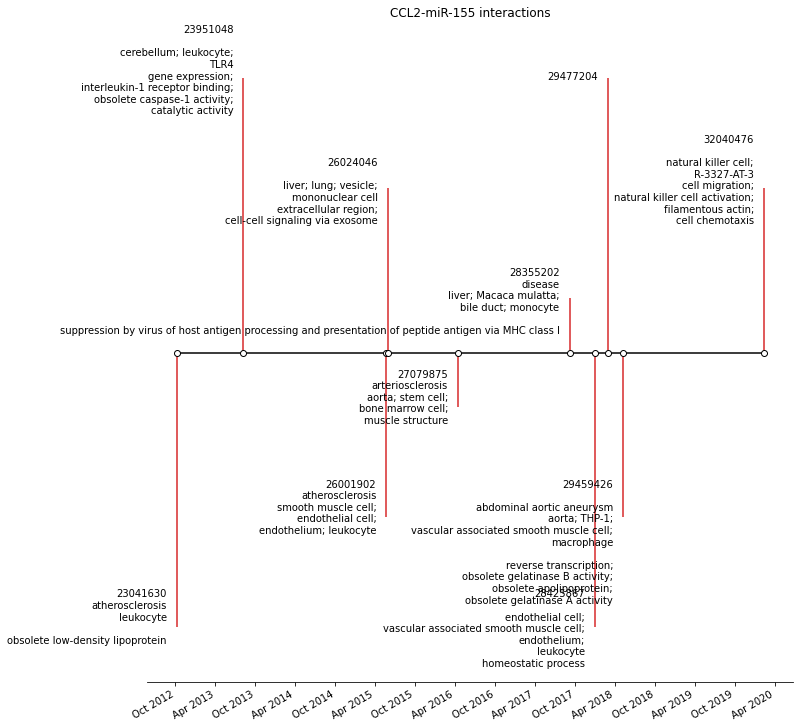

In [13]:
make_timeline(int2pubdate[('CCL2', 'miR-155')], "CCL2-miR-155 interactions", "ccl2_mir155_timeline.png") 

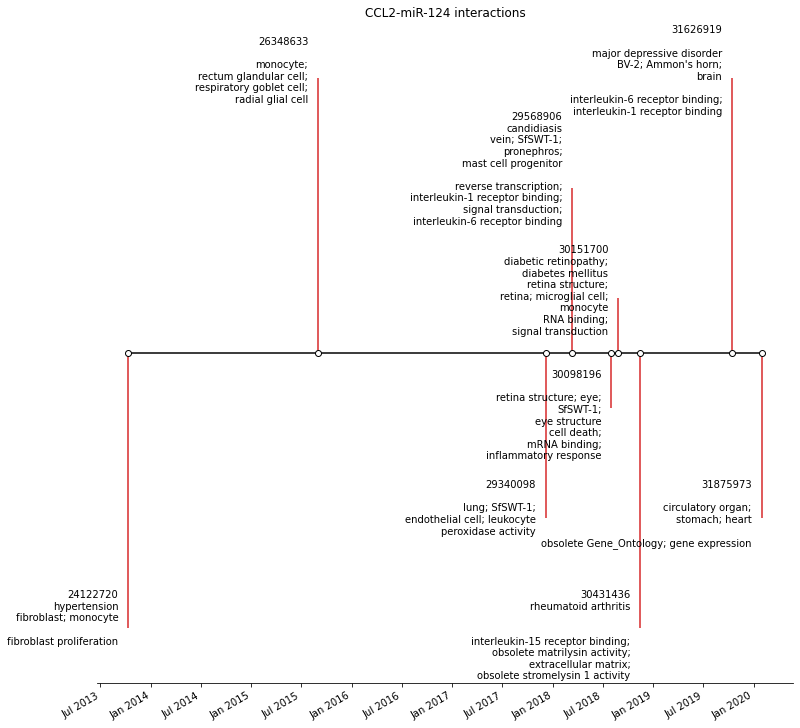

In [18]:
make_timeline(int2pubdate[('CCL2', 'miR-124')], "CCL2-miR-124 interactions", "ccl2_mir124_timeline.png") 

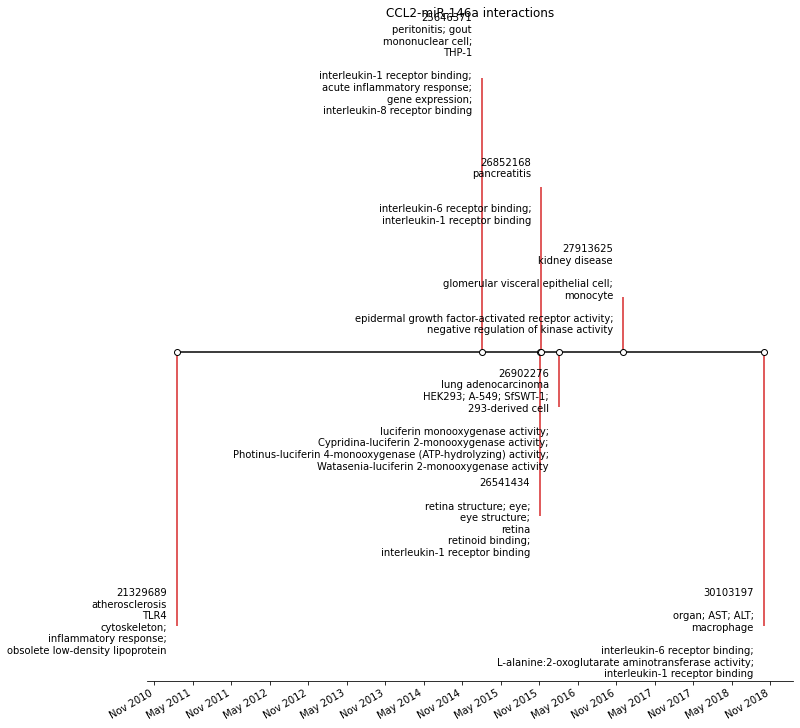

In [19]:
make_timeline(int2pubdate[('CCL2', 'miR-146a')], "CCL2-miR-146a interactions", "ccl2_mir146a_timeline.png") 

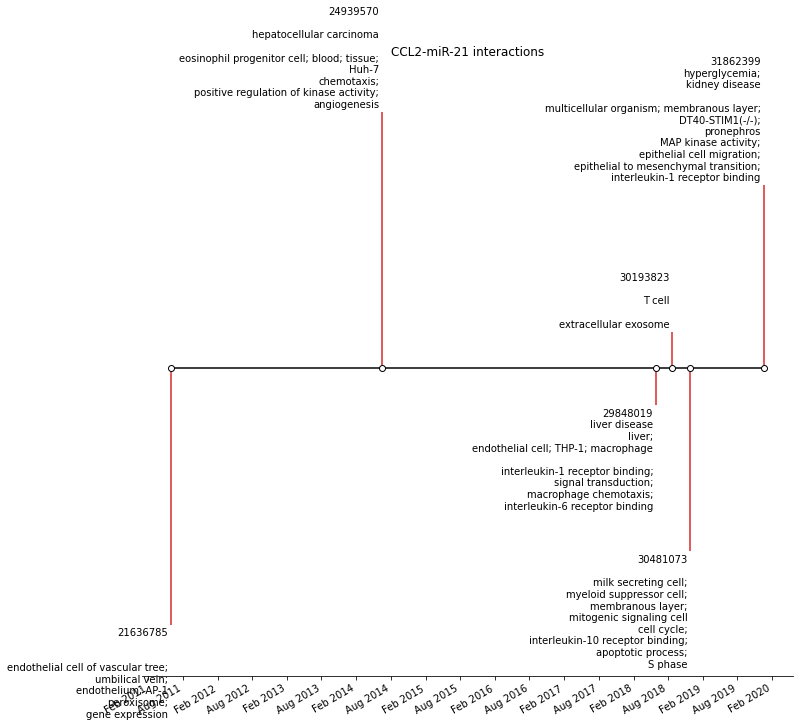

In [27]:
make_timeline(int2pubdate[('CCL2', 'miR-21')], "CCL2-miR-21 interactions") 